# t-SNE

- 비선형 차원 축소 기법 (고차원 → 저차원)
- 주로 고차원 데이터의 국소 구조를 보존하면서 2차원 또는 3차원으로 시각화하기 위해 사용
- 고차원의 경우: 거리 기반의 유사도 (가우시안 분포를 이용한 계산)
- 저차원의 경우: 확률적으로 비슷하게 재현 (t-분포를 이용한 계산)
    - 멀리 떨어진 점간의 거리 차이를 완화시키기 위해 t-분포 사용

--------------------PCA(선형)에 fit_transform한 데이터를 tsne(비선형)에 또 fit_transfrom할 수 있음 -> 저차원 데이터는 이렇게 하면 계산 수월해짐
고차원 데이터는 스케일링한 데이터를 바로 tsne에 쓰면 더 간단해짐

### cf. 거리 계산 방식
- 유클리드 거리 (euclidean) : 기본적인 직선 거리
- 맨해튼 거리 (manhattan) : 직각 축 기반
- 체비쇼프 거리 (chebyshev) : 
- 코사인 거리 (cosine) : 벡터 방향 기반
- 마할라노비스 거리 (mahalanobis) : 변수 간 상관관계 반영
- 해밍 거리 (hamming) : 이진 데이터 전용

- **매개변수**
    - <span style="color:#ffd33d">**n_components**</span>
        </br>: 축소할 차원의 개수
        - 기본값: 2
    - <span style="color:#ffd33d">**perplexity**</span>
        </br>: 이웃의 수 제어 (군집 크기에 민감)
        - 기본값: 30
            - 보통 5 - 50 정도의 값
            - 일반적으로는 샘플의 개수 ÷ 3
            - 값이 작은 경우 작은 구조, 너무 값이 큰 경우 전체 구조 포괄
    - <span style="color:#ffd33d">**early_exggerarion**</span>
        </br>: 초기 학습에서 군집 간의 거리 지정 (분리 촉진)
        - 기본값: 12
    - <span style="color:#ffd33d">**learning_rate**</span>
        </br>: 학습 속도
        - 기본값: 'auto'
            - 보통 100 - 1000 정도의 값 
            - 너무 작게 지정하면 수렴 느려짐
            - 너무 크게 지정하면 군집 왜곡됨
    - <span style="color:#ffd33d">**max_iter**</span>
        </br>: 전체 학습 반복 횟수
        - 기본값: 1000
    - <span style="color:#ffd33d">**n_iter_without_progress**</span>
        </br>: 개선이 없을 때 조기 종료 기준
        - 기본값: 300
    - <span style="color:#ffd33d">**init**</span>
        </br>: 초기 좌표를 설정하는 방법
        - 기본값: 'pca'
            - 'random' : 좌표 무작위 선택
    - <span style="color:#ffd33d">**metric**</span>
        </br>: 거리 계산 방식 선택
        - 기본값: 'euclidean' (기본값 사용 추천 - 빠른 속도)
    - <span style="color:#ffd33d">**method**</span>
        </br>: 
        - 기본값: 'barnes_hut' (기본값 사용 추천 - 빠른 속도)
            - 'exact' : 정확하지만 시간 증가
    - <span style="color:#ffd33d">**angle**</span>
        </br>: barnes_hut 근사 정확도를 제어
        - 기본값: 0.5
            - 작을수록 정확하고 느림

- **속성**
    - <span style="color:#ffd33d">**embedding_**</span>
        </br>: 변환된 저차원 데이터를 반환
    - <span style="color:#ffd33d">**kl_devergence_**</span>
        </br>: 최종 KL 발산 값 반환
        - 작을수록 원래의 구조와 유사

- **메소드**
    - <span style="color:#ffd33d">**fit()**</span>
        </br>: 모델에 데이터를 학습
    - <span style="color:#ffd33d">**transform()**</span>
        </br>: 데이터를 저차원으로 변환
    - <span style="color:#ffd33d">**fit_transform()**</span>
        </br>: 데이터를 학습하고 저차원으로 변환

In [74]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [75]:
# 데이터셋 로드
digits = load_digits()

In [76]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

---
손글씨 데이터

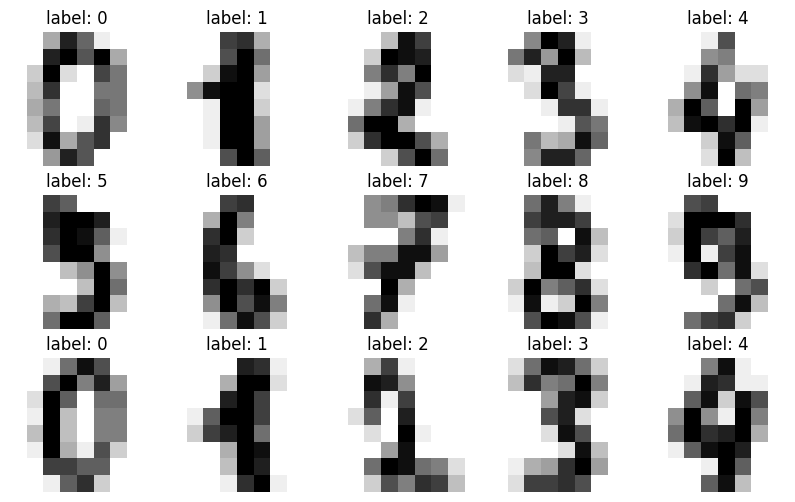

In [77]:
plt.figure(figsize=(10, 6))

for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(digits.images[i], cmap= 'gray_r')
    plt.title(f'label: {digits.target[i]}')
    plt.axis('off')

plt.show()

In [78]:
# 데이터를 스케일링
X_std = StandardScaler().fit_transform(digits['data'])
Y = digits['target']

In [79]:
# 차원 축소 class 생성
tsne = TSNE(
    n_components= 2,
    perplexity= 40,
    learning_rate= 'auto',  # 기본값
    random_state= 42,
    n_jobs= -1                # 멀티코어 전체 사용
)

X_tsne = tsne.fit_transform(X_std)

In [80]:
X_std.shape

(1797, 64)

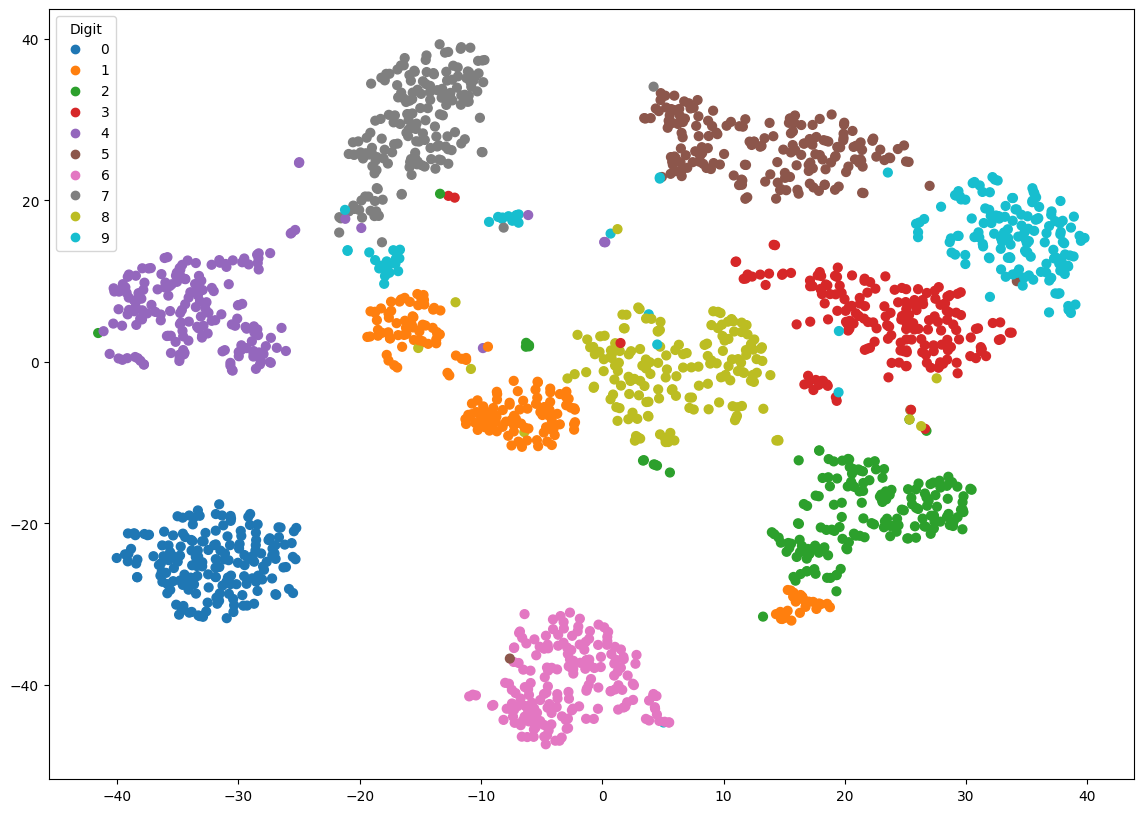

In [81]:
# 64차원의 데이터를 2차원으로 변경하고 데이터의 분류를 그래프로 시각화
plt.figure(figsize=(14, 10))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= Y, cmap= 'tab10', s= 40)

plt.legend(*sc.legend_elements(), title= 'Digit')
plt.show()

In [82]:
print("KL divergence: ", round(tsne.kl_divergence_, 4))
print("iteration: ", tsne.n_iter_)

KL divergence:  0.801
iteration:  999


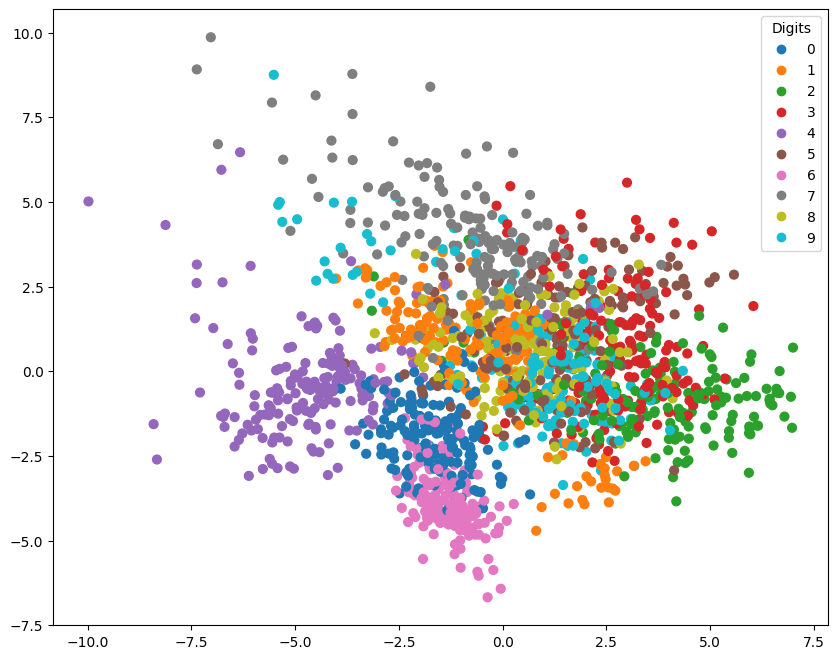

In [83]:
# PCA로 2차원 데이터 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_std)

# 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c= Y,
                 cmap= 'tab10', s= 40)
plt.legend(*sc.legend_elements(), title='Digits')
plt.show()

---
반달 데이터

In [84]:
from sklearn.datasets import make_moons

In [85]:
# 반월 모양의 데이터셋을 생성
X, Y = make_moons(n_samples= 1000, noise= 0.1, random_state= 42)
X_std = StandardScaler().fit_transform(X)

In [86]:
X_std.shape

(1000, 2)

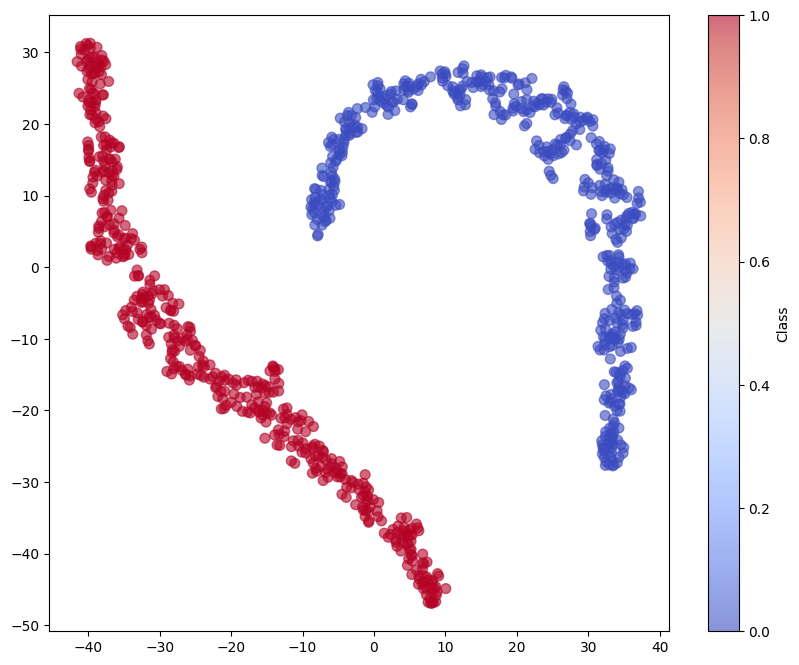

In [87]:
# T_SNE를 적용하여 2차원 데이터로 구성
tsne = TSNE(n_components= 2, perplexity= 30, learning_rate= 200, random_state= 42)
X_tsne = tsne.fit_transform(X_std)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= Y, cmap= 'coolwarm', s= 50, alpha= 0.6)

plt.colorbar(label= 'Class')
plt.show()

---
bodyPerformance 데이터를 이용하여 tsne 차원 축소

In [88]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [89]:
# bodyPerformance 데이터
body = pd.read_csv('../data/bodyPerformance.csv')

In [90]:
# dtypes가 'object'인 컬럼을 모두 선택해 LabelEncoder로 변환
# dtypes가 'object'인 컬럼의 목록 확인
obj_list = body.select_dtypes('object').columns.tolist()
obj_list

['gender', 'class']

In [91]:
for col in obj_list:
    le = LabelEncoder()
    body[col] = le.fit_transform(body[col].values)

body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [92]:
# 고차원 데이터에서는 PCA를 통해 (30-50차원으로) 1차적으로 차원 축소 후,
# t-SNE를 이용하여 2차 축소 -> t-SNE의 안정성과 속도 향상

X = body.drop('class', axis= 1).values
Y = body['class'].values
# X를 스케일링
X_std = StandardScaler().fit_transform(X)

# PCA를 통해 1차 차원 축소
X_pca = PCA(
    n_components= min(30, X_std.shape[1]),
    random_state= 42
).fit_transform(X_std)

In [93]:
X_pca.shape   # 11개 그대로

(13393, 11)

In [94]:
# t-SNE를 이용하여 2차 차원 축소
tsne = TSNE(
    n_components= 2,
    perplexity= 40,
    random_state= 42
)

X_tsne = tsne.fit_transform(X_pca)

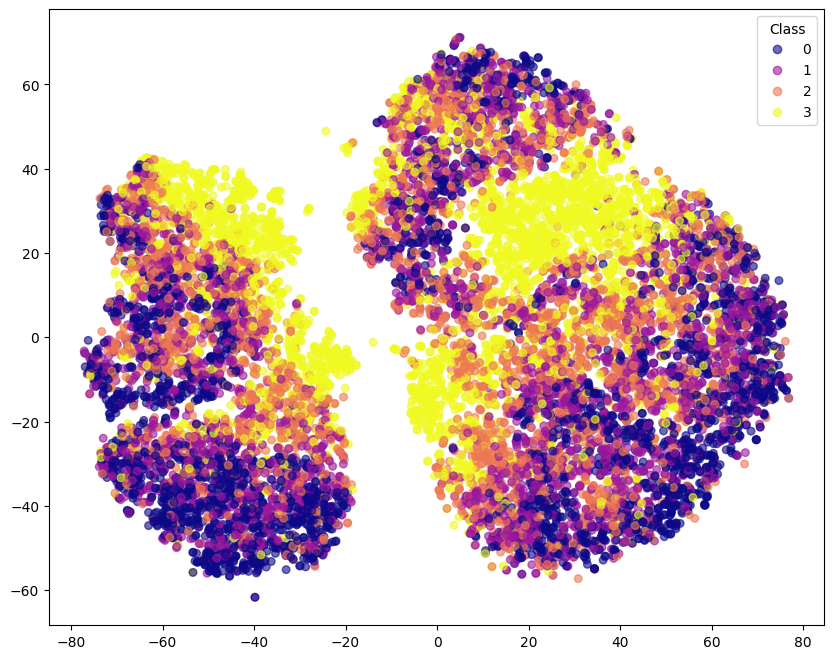

In [95]:
# 클래스를 기준으로 데이터를 시각화
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c= Y, cmap= 'plasma', s= 30, alpha= 0.6
)
plt.legend(*sc.legend_elements(), title='Class')
plt.show()

In [96]:
# 샘플 고차원 데이터를 생성
from sklearn.datasets import make_blobs

In [97]:
# 3개의 군집 데이터를 고차원 데이터로 생성
X, Y = make_blobs(n_samples= 500, centers= 3, n_features= 60, cluster_std= 2, random_state= 42)

In [98]:
X.shape

(500, 60)

In [99]:
# 스케일링 작업
X_std = StandardScaler().fit_transform(X)

In [100]:
import time

KL divergence:  0.8835
실행 시간:  1.7726


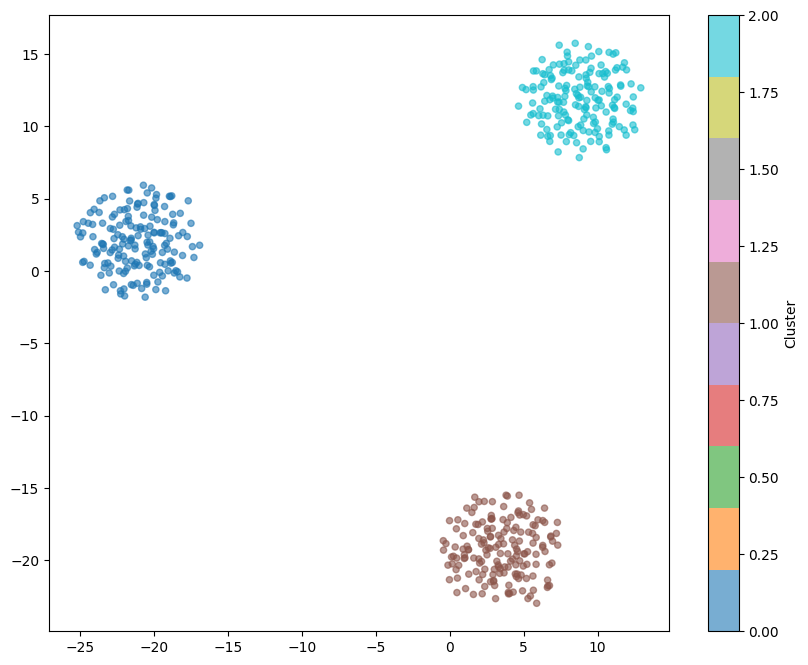

In [101]:
# 시작 시간을 입력
start = time.time()

# t-SNE만을 사용해서 2차원 차원 축소
tsne = TSNE(
    n_components= 2,
    perplexity= 40,
    random_state= 42
)
X_tsne = tsne.fit_transform(X_std)

# 종료 시간 입력
end = time.time()

# KLd_divergence 값 확인
# 고차원과 저차원 확률 분포의 차이 (작을수록 좋음)
print("KL divergence: ", round(tsne.kl_divergence_, 4))

# 총 실행 시간 출력
print('실행 시간: ', round( (end-start), 4))

plt.figure(figsize=(10, 8))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c= Y, cmap= 'tab10', s= 20, alpha= 0.6
)
plt.colorbar(label= 'Cluster')
plt.show()

KL divergence:  0.8692
실행 시간:  1.7019


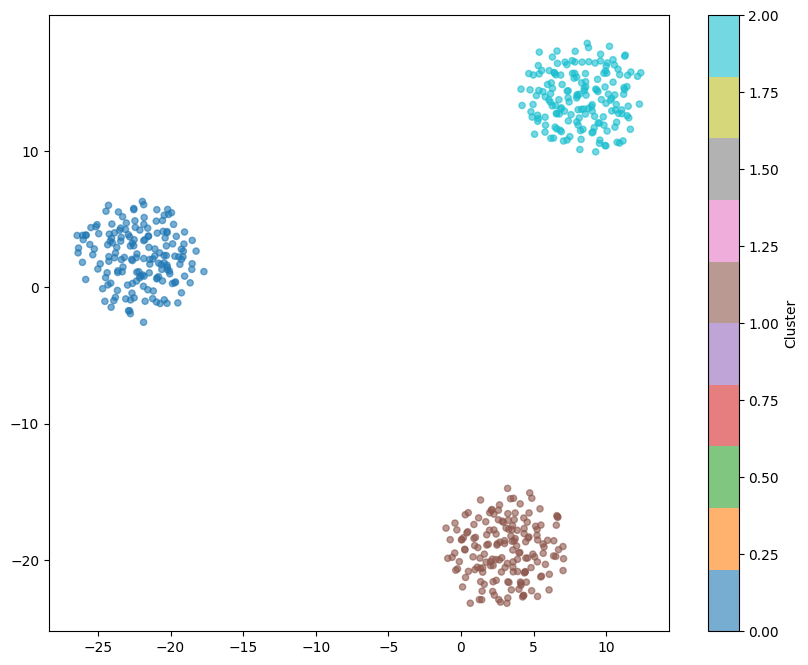

In [102]:
# PCA 와 t-SNE 를 이용하여 차원 축소 실행
# PCA를 통해 차원을 30으로 축소한 뒤 t-SNE 사용

# 시작 시간을 입력
start = time.time()

# PCA를 통해 1차 차원 축소
X_pca = PCA(
    n_components= min(30, X_std.shape[1]),
    random_state= 42
).fit_transform(X_std)

tsne = TSNE(
    n_components= 2,
    perplexity= 40,
    random_state= 42
)

# PCA를 이용한 차원 축소 데이터(X_pca)를 이용하여 t-SNE로 2차 축소
X_tsne = tsne.fit_transform(X_pca)

# 종료 시간 입력
end = time.time()

# PCA는 생성하며 fit_transform까지 진행
# t-SNE는 생성한 뒤 fit_transform 따로 진행
    # --> KL divergence값 가져오기 위해서!
print("KL divergence: ", round(tsne.kl_divergence_, 4))

# 총 실행 시간 출력
print('실행 시간: ', round( (end-start), 4))

plt.figure(figsize=(10, 8))
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c= Y, cmap= 'tab10', s= 20, alpha= 0.6
)
plt.colorbar(label= 'Cluster')
plt.show()